In [2]:
%matplotlib inline
import os
import os.path as osp
import numpy as np
import re
import glob
import pandas as pd
import json
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

In [3]:
train_dir = "/mnt/raid0sata1/gnn/Rot_drum_mono/"
timestemp_list = glob.glob(osp.join(train_dir, "Rot_drum_mono_*.p4p"))
timestemp_list = list(map(lambda x: re.split(r'[/_.]', x)[-2], timestemp_list))
timestemp_list = sorted(timestemp_list, key=int)

In [4]:
timestemp_list

['00000000',
 '00100001',
 '00200002',
 '00300004',
 '00313728',
 '00400005',
 '00500006',
 '00600007',
 '00700008',
 '00800009',
 '00900011',
 '01000010',
 '01100000',
 '01200000',
 '01300000',
 '01400000',
 '01500010',
 '01600010',
 '01700010',
 '01800010',
 '01900010',
 '02000010',
 '02100000',
 '02200000',
 '02300000',
 '02400000',
 '02500010',
 '02600010',
 '02700010',
 '02800010',
 '02900010',
 '03000010',
 '03100000',
 '03200000',
 '03300000',
 '03400000',
 '03500010',
 '03600010',
 '03700010',
 '03800010',
 '03900010',
 '04000010',
 '04100000',
 '04200000',
 '04300000',
 '04400000',
 '04500000',
 '04600010',
 '04700010',
 '04800010',
 '04900010',
 '05000010',
 '05100010',
 '05200000',
 '05300000',
 '05400000',
 '05500000',
 '05600010',
 '05700010',
 '05800010',
 '05900010',
 '06000010',
 '06100010',
 '06200000',
 '06300000',
 '06400000',
 '06500000',
 '06600010',
 '06700010',
 '06800010',
 '06900010',
 '07000010',
 '07100010',
 '07200000',
 '07300000',
 '07400000',
 '07500000',

In [5]:
f_read = open(osp.join(train_dir, "metadata.json"), 'r')
meta_data = json.load(f_read)
f_read.close()

In [6]:
meta_data

{'geometry': {'name': 'Cylinder',
  'axis_start': [0, -0.025, 0],
  'axis_end': [0, 0.025, 0],
  'radius': 0.07,
  'angular_velocity': 1.04719755,
  'direction': 'negative'},
 'bounds': [[-0.07125910840977852,
   -0.025500000000000016,
   -0.07139999999999995],
  [0.07125910840977857, 0.025500000000000016, 0.07139999999999995]],
 'sequence_length': 2740,
 'dim': 3,
 'dt': 0.00999634903249361,
 'vel_mean': [7.571308179772536e-08,
  4.211914187017549e-08,
  2.405513045873857e-07],
 'vel_std': [0.011193100991210856, 0.003889435296185484, 0.007141669874813283],
 'acc_mean': [1.410760027556752e-05,
  -4.226051416270286e-06,
  5.145309571192907e-06],
 'acc_std': [1.6843812767063837, 0.5699718845844648, 1.0645187737596535]}

In [6]:
dt = meta_data['dt']
dt

0.009997500624843789

In [8]:
all_velocities = []
s = 0
for i in timestemp_list:
    if s > 0:
        break
    try:
        p4p_data = pd.read_csv(osp.join(train_dir, "Rot_drum_mono_{}.p4p".format(i)), skiprows=3, sep=" ", header=None)
        p4p_data.columns = ['ID', 'GROUP', 'VOLUME', 'MASS', 'POS_X', 'POS_Y','POS_Z', 'VEL_X', 'VEL_Y',
                           'VEL_Z', 'AVG_VEL_X', 'AVG_VEL_Y', 'AVG_VEL_Z', 'AVG_ACC_X', 'AVG_ACC_Y', 'AVG_ACC_Z',
                           'ANG_VEL_X', 'ANG_VEL_Y', 'ANG_VEL_Z', 'TORQ_X', 'TORQ_Y', 'TORQ_Z']
        p4p_data.sort_values(by=['ID'], inplace=True)
        p4p_data.reset_index(drop=True, inplace=True)
        p4p_data['VEL_MAGNITUDE'] = np.sqrt(p4p_data['VEL_X']**2 + p4p_data['VEL_Y']**2 + p4p_data['VEL_Z']**2)
        all_velocities.append(p4p_data['VEL_MAGNITUDE'].values)
        s += 1
    except:
        continue


In [9]:
p4p_data

,ID,GROUP,VOLUME,MASS,POS_X,POS_Y,POS_Z,VEL_X,VEL_Y,VEL_Z,...,AVG_ACC_X,AVG_ACC_Y,AVG_ACC_Z,ANG_VEL_X,ANG_VEL_Y,ANG_VEL_Z,TORQ_X,TORQ_Y,TORQ_Z,VEL_MAGNITUDE
0,1,0,1.767146e-09,0.000004,-0.048612,-0.013452,-0.043645,0.888771,-0.045579,-1.247934,...,0,0,0,-6.007326,-32.276087,151.448785,0.000000e+00,0.000000e+00,0.000000e+00,1.532753
1,2,0,1.767146e-09,0.000004,-0.011037,0.001027,-0.034625,0.000000,0.000000,-2.098089,...,0,0,0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.098089
2,3,0,1.767146e-09,0.000004,-0.030452,-0.021920,-0.023701,0.000000,0.000000,-2.098089,...,0,0,0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.098089
3,4,0,1.767146e-09,0.000004,-0.008429,-0.016635,-0.006758,0.000000,0.000000,-2.098089,...,0,0,0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.098089
4,5,0,1.767146e-09,0.000004,0.016565,-0.014975,-0.017837,0.000000,0.000000,-2.098089,...,0,0,0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.098089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59834,59835,0,1.767146e-09,0.000004,0.005522,0.022675,-0.063640,-0.290923,-0.162150,-0.080400,...,0,0,0,-212.951051,-21.505088,-189.656511,6.332804e-07,3.593729e-07,8.872989e-07,0.342626
59835,59836,0,1.767146e-09,0.000004,0.036652,-0.005908,-0.021135,0.000000,0.000000,-2.098089,...,0,0,0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.098089
59836,59837,0,1.767146e-09,0.000004,0.029737,0.013847,-0.047585,0.000000,0.000000,-2.098089,...,0,0,0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.098089
59837,59838,0,1.767146e-09,0.000004,0.023498,0.010644,0.030954,0.000000,0.000000,-2.098089,...,0,0,0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.098089


In [19]:
all_concat_velocities = np.concatenate(all_velocities, axis=0)

In [21]:
len(all_concat_velocities)

145127424

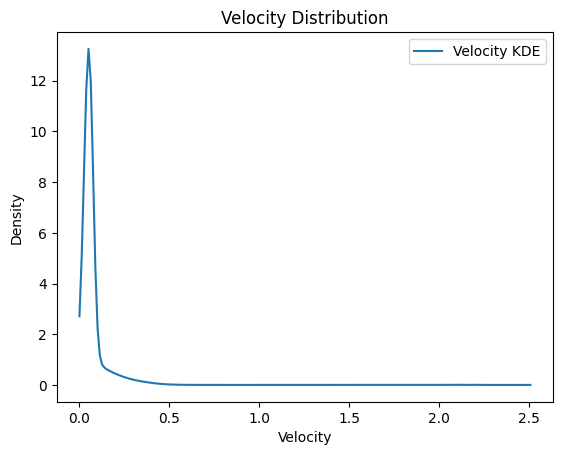

In [25]:
density = gaussian_kde(all_concat_velocities)
xs = np.linspace(min(all_concat_velocities), max(all_concat_velocities), 200)
density.covariance_factor = lambda : .25
density._compute_covariance()

plt.plot(xs, density(xs), label='Velocity KDE')

plt.title('Velocity Distribution')
plt.xlabel('Velocity')
plt.ylabel('Density')

plt.legend()
plt.show()

In [27]:
available_timestemp = []
for i in timestemp_list:
    try:
        p4p_data = pd.read_csv(osp.join(train_dir, "SAG_Mill_{}.p4p".format(i)), skiprows=3, sep=" ", header=None)
        available_timestemp.append(int(i))
    except:
        continue

In [28]:
print([int(i) for i in available_timestemp])

[100001, 200002, 200015, 300004, 400005, 500006, 600007, 700009, 800010, 900011, 1000000, 1100000, 1200000, 1300000, 1400010, 1500010, 1600010, 1700010, 1800010, 1900010, 2000000, 2100000, 2200000, 2300000, 2400010, 2500010, 2600010, 2700010, 2800010, 2900010, 3000000, 3100000, 3200000, 3300000, 3400010, 3500010, 3600010, 3700010, 3800010, 3900010, 4000000, 4100000, 4200000, 4300000, 4400010, 4500010, 4600010, 4700010, 4800010, 4900000, 5000000, 5100000, 5200000, 5300000, 5400010, 5500010, 5600010, 5700010, 5800010, 5900000, 6000000, 6100000, 6200000, 6300010, 6400010, 6500010, 6600010, 6700010, 6800010, 6900000, 7000000, 7100000, 7200000, 7300010, 7400010, 7500010, 7600010, 7700010, 7800010, 7900000, 8000000, 8100000, 8200000, 8300010, 8400010, 8500010, 8600010, 8700010, 8800010, 8900000, 9000000, 9100000, 9200000, 9300010, 9400010, 9500010, 9600010, 9700010, 9800000, 9900000, 10000000, 10100000, 10200000, 10300000, 10400000, 10500000, 10600000, 10700000, 10800000, 10900000, 11000000,

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pickle
res_data = pickle.load(open('/home/jysc/gns/results/rollouts/SAGMill/rollout_0.pkl', 'rb'))
predicted = res_data['predicted_rollout']
last_scene = predicted[1]

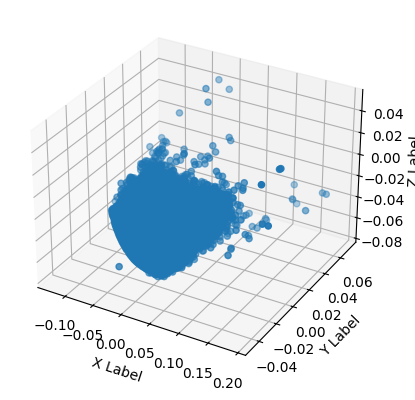

In [9]:
x = last_scene[:, 0]
y = last_scene[:, 1]
z = last_scene[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# Labeling axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [5]:
x

array([-1357.973 , -1358.06  , -1358.0638, ..., -1357.8534, -1357.8667,
       -1357.8514], dtype=float32)

In [10]:
import torch
a = torch.tensor([[1,2,3],[4,5,6]])
b = torch.tensor([0,1,2])
a - b

tensor([[1, 1, 1],
        [4, 4, 4]])